# Import Libraries

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.cluster import KMeans
from tqdm import tqdm
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import VarianceThreshold

# Load Data

Check for duplicates and missing values

In [71]:
# Read Dataframe from .csv file
data = pd.read_csv('data.csv', index_col='id')

# Dataset Shape and Preview of the first 5 rows
print('Dataframe shape:', data.shape)
data.head()

Dataframe shape: (98000, 29)


,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
id,,,,,,,,,,,,,,,,,,,,,
0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,14,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,6,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,5,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,13,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,5,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [72]:
print(f'\nTotal missing values: {data.isna().sum().sum()}')

if data.isna().sum().sum() > 0:
    print('Missing values per column:')
    print(data.isna().sum())


Total missing values: 0


In [73]:
print(f'Number of duplicate rows in dataset: {data.duplicated().sum()}')

Number of duplicate rows in dataset: 0


There is no missing values and no duplicate rows.

# Exploratory data analysis

In [74]:
data.dtypes

f_00    float64
f_01    float64
f_02    float64
f_03    float64
f_04    float64
f_05    float64
f_06    float64
f_07      int64
f_08      int64
f_09      int64
f_10      int64
f_11      int64
f_12      int64
f_13      int64
f_14    float64
f_15    float64
f_16    float64
f_17    float64
f_18    float64
f_19    float64
f_20    float64
f_21    float64
f_22    float64
f_23    float64
f_24    float64
f_25    float64
f_26    float64
f_27    float64
f_28    float64
dtype: object

Columns from f_00 to f_06 and form f14 to f_28 are continuous values.
Columns form f_07 to f_13 are discrete values

Check the distributions of the different features

Column: f_00
Mean Value: 0.0012196663854834395
Standard deviation: 1.0028008443406387
Min Value: -4.732235092816399
Max Value: 4.490521472882684
Normal Distribution


/Users/sergiotallotorres/PycharmProjects/kaggle_competitions/env/lib/python3.10/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<Figure size 576x576 with 0 Axes>

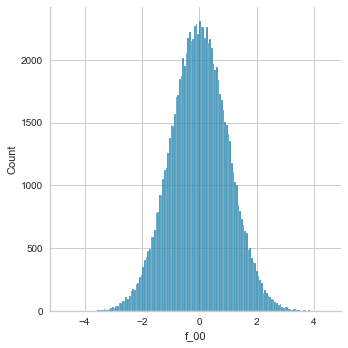

--------------------------------------------------
Column: f_01
Mean Value: 0.005579517709309538
Standard deviation: 1.0007417893509403
Min Value: -4.202795099679842
Max Value: 4.324973897655727
Normal Distribution


/Users/sergiotallotorres/PycharmProjects/kaggle_competitions/env/lib/python3.10/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<Figure size 576x576 with 0 Axes>

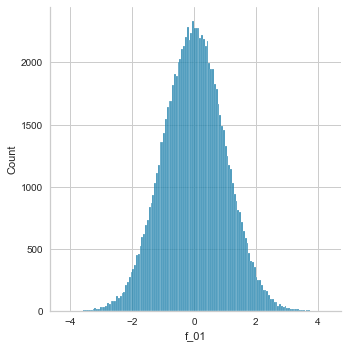

--------------------------------------------------
Column: f_02
Mean Value: -0.0010418283075851274
Standard deviation: 1.0013731406044029
Min Value: -4.377020736467047
Max Value: 4.5602474300232965
Normal Distribution


/Users/sergiotallotorres/PycharmProjects/kaggle_competitions/env/lib/python3.10/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<Figure size 576x576 with 0 Axes>

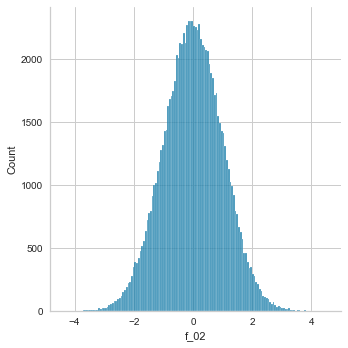

--------------------------------------------------
Column: f_03
Mean Value: -0.0007001807963589238
Standard deviation: 1.000422331364304
Min Value: -4.010826128721371
Max Value: 4.399373141505628
Normal Distribution


/Users/sergiotallotorres/PycharmProjects/kaggle_competitions/env/lib/python3.10/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<Figure size 576x576 with 0 Axes>

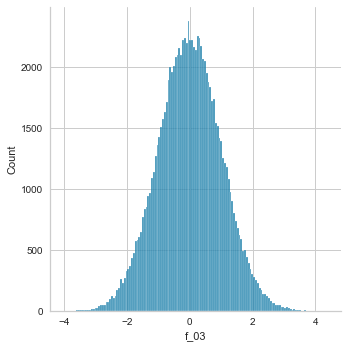

/Users/sergiotallotorres/PycharmProjects/kaggle_competitions/env/lib/python3.10/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


--------------------------------------------------
Column: f_04
Mean Value: -0.0035219036279638483
Standard deviation: 1.0030612576721685
Min Value: -4.535903250526845
Max Value: 4.050548509668483
Normal Distribution


<Figure size 576x576 with 0 Axes>

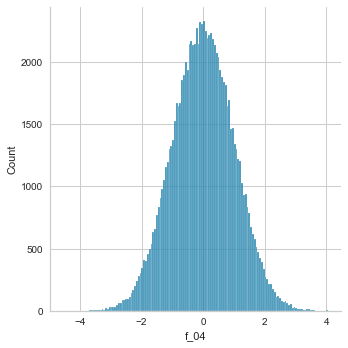

--------------------------------------------------
Column: f_05
Mean Value: -0.0016118329463780464
Standard deviation: 1.0005316032947835
Min Value: -4.30076681391698
Max Value: 4.710315737605659
Normal Distribution


/Users/sergiotallotorres/PycharmProjects/kaggle_competitions/env/lib/python3.10/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<Figure size 576x576 with 0 Axes>

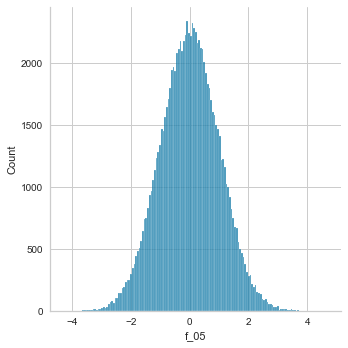

--------------------------------------------------
Column: f_06
Mean Value: -0.003041598446751932
Standard deviation: 0.9974337077545695
Min Value: -4.894525278941793
Max Value: 3.99859514899742


/Users/sergiotallotorres/PycharmProjects/kaggle_competitions/env/lib/python3.10/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Normal Distribution


<Figure size 576x576 with 0 Axes>

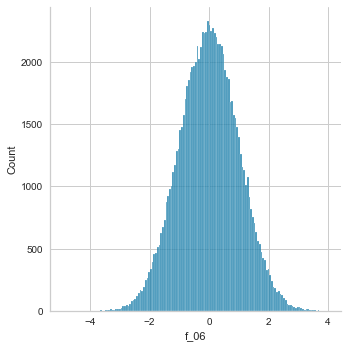

--------------------------------------------------
Column: f_07
Mean Value: 5.545918367346939
Standard deviation: 3.6918401432306363
Min Value: 0
Max Value: 32
Not Normal Distribution


/Users/sergiotallotorres/PycharmProjects/kaggle_competitions/env/lib/python3.10/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


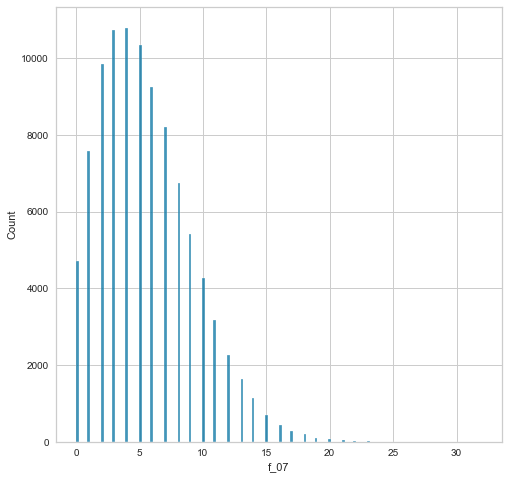

--------------------------------------------------
Column: f_08
Mean Value: 6.763061224489796
Standard deviation: 4.15234814762191
Min Value: 0
Max Value: 30
Not Normal Distribution


/Users/sergiotallotorres/PycharmProjects/kaggle_competitions/env/lib/python3.10/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


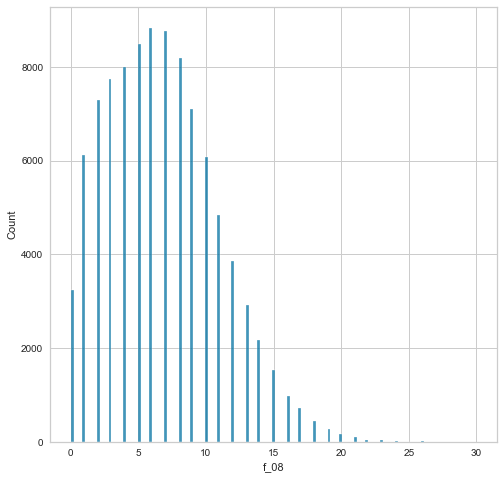

--------------------------------------------------
Column: f_09
Mean Value: 8.193163265306122
Standard deviation: 5.904918641071406
Min Value: 0
Max Value: 44
Not Normal Distribution


/Users/sergiotallotorres/PycharmProjects/kaggle_competitions/env/lib/python3.10/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


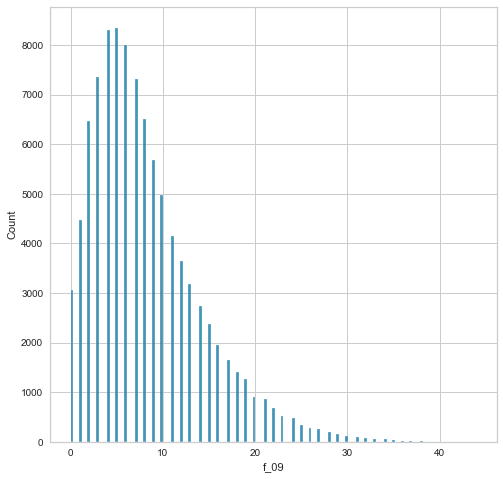

--------------------------------------------------
Column: f_10
Mean Value: 8.057877551020407
Standard deviation: 4.700225581485239
Min Value: 0
Max Value: 36
Not Normal Distribution


/Users/sergiotallotorres/PycharmProjects/kaggle_competitions/env/lib/python3.10/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


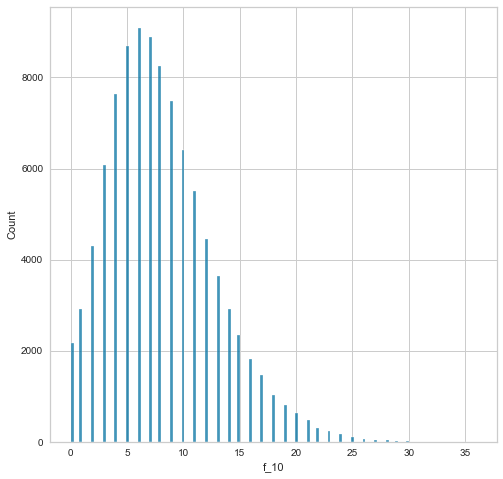

--------------------------------------------------
Column: f_11
Mean Value: 8.084989795918368
Standard deviation: 4.197106310853215
Min Value: 0
Max Value: 28
Not Normal Distribution


/Users/sergiotallotorres/PycharmProjects/kaggle_competitions/env/lib/python3.10/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


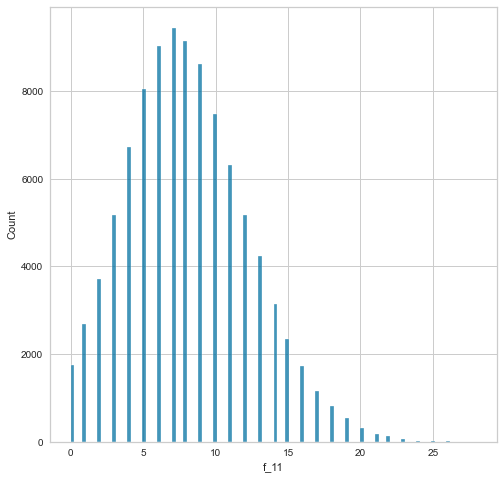

--------------------------------------------------
Column: f_12
Mean Value: 7.076387755102041
Standard deviation: 4.433308314004286
Min Value: 0
Max Value: 38
Not Normal Distribution


/Users/sergiotallotorres/PycharmProjects/kaggle_competitions/env/lib/python3.10/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


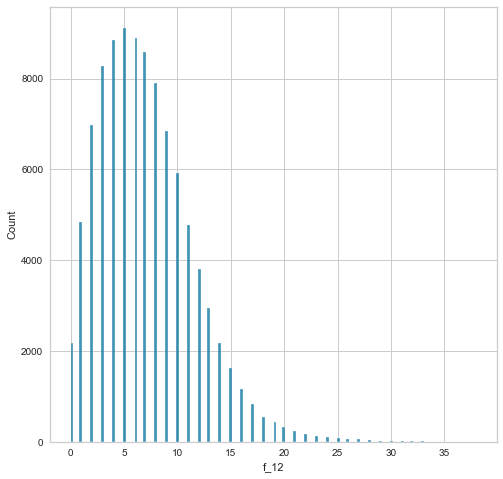

--------------------------------------------------
Column: f_13
Mean Value: 6.286102040816327
Standard deviation: 4.120076834547958
Min Value: 0
Max Value: 30
Not Normal Distribution


/Users/sergiotallotorres/PycharmProjects/kaggle_competitions/env/lib/python3.10/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


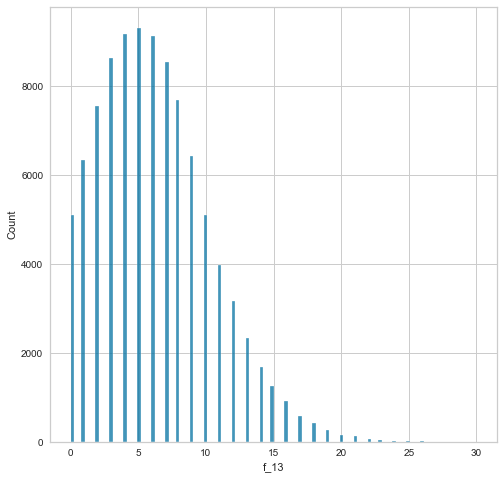

--------------------------------------------------
Column: f_14
Mean Value: 0.0034133502434545307
Standard deviation: 0.9989396027508508
Min Value: -4.377020736467047
Max Value: 4.490521472882684
Normal Distribution


/Users/sergiotallotorres/PycharmProjects/kaggle_competitions/env/lib/python3.10/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<Figure size 576x576 with 0 Axes>

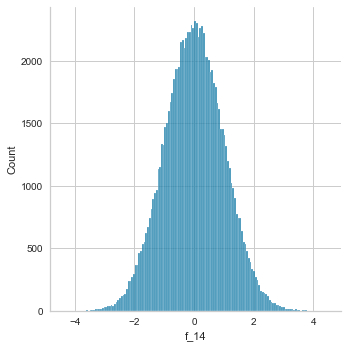

--------------------------------------------------
Column: f_15
Mean Value: -0.0026388587431521193
Standard deviation: 1.0010959008799138
Min Value: -4.535903250526845
Max Value: 4.270708171675309
Normal Distribution


/Users/sergiotallotorres/PycharmProjects/kaggle_competitions/env/lib/python3.10/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<Figure size 576x576 with 0 Axes>

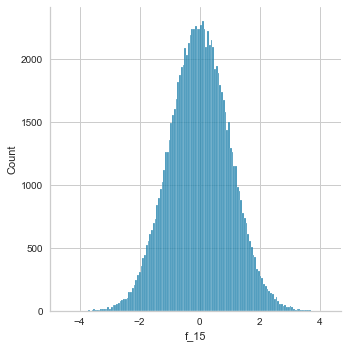

--------------------------------------------------
Column: f_16
Mean Value: 0.005403803291794085
Standard deviation: 1.003277006429853
Min Value: -4.182232518525651
Max Value: 4.157538356077318
Normal Distribution


/Users/sergiotallotorres/PycharmProjects/kaggle_competitions/env/lib/python3.10/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<Figure size 576x576 with 0 Axes>

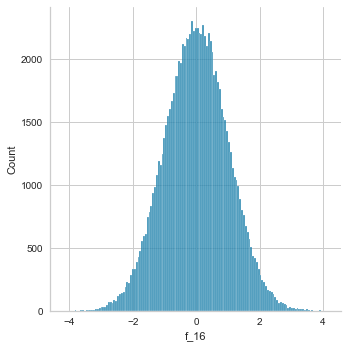

--------------------------------------------------
Column: f_17
Mean Value: 0.0016560384205104633
Standard deviation: 1.001257526011278
Min Value: -4.468929964559637
Max Value: 4.230848924641415
Normal Distribution


/Users/sergiotallotorres/PycharmProjects/kaggle_competitions/env/lib/python3.10/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<Figure size 576x576 with 0 Axes>

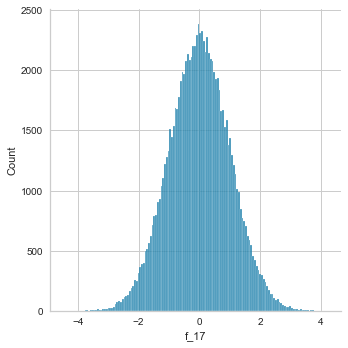

--------------------------------------------------
Column: f_18
Mean Value: -0.005399351001747256
Standard deviation: 0.995965248274986
Min Value: -4.149688332529795
Max Value: 4.710315737605659
Normal Distribution


/Users/sergiotallotorres/PycharmProjects/kaggle_competitions/env/lib/python3.10/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<Figure size 576x576 with 0 Axes>

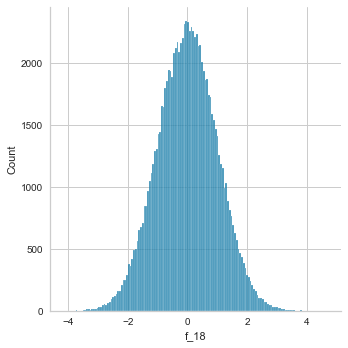

--------------------------------------------------
Column: f_19
Mean Value: -0.004512620367727158
Standard deviation: 1.0043718031633782
Min Value: -4.894525278941793
Max Value: 4.5602474300232965
Normal Distribution


/Users/sergiotallotorres/PycharmProjects/kaggle_competitions/env/lib/python3.10/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<Figure size 576x576 with 0 Axes>

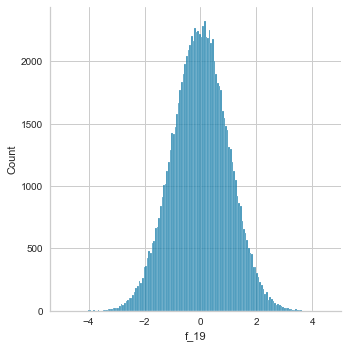

/Users/sergiotallotorres/PycharmProjects/kaggle_competitions/env/lib/python3.10/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


--------------------------------------------------
Column: f_20
Mean Value: -0.0005153921354599559
Standard deviation: 1.0029619378365018
Min Value: -4.732235092816399
Max Value: 4.399373141505628
Normal Distribution


<Figure size 576x576 with 0 Axes>

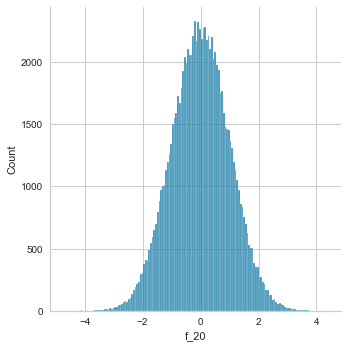

--------------------------------------------------
Column: f_21
Mean Value: -0.0016699983279041155
Standard deviation: 0.9997028161384486
Min Value: -4.43813020020764
Max Value: 4.135418940620379


/Users/sergiotallotorres/PycharmProjects/kaggle_competitions/env/lib/python3.10/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Normal Distribution


<Figure size 576x576 with 0 Axes>

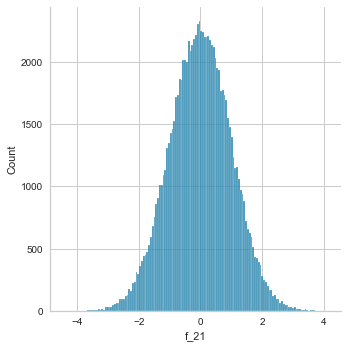

--------------------------------------------------
Column: f_22
Mean Value: -0.038752016993019375
Standard deviation: 1.477858183368349
Min Value: -6.873999251158088
Max Value: 6.517721259517502
Not Normal Distribution


/Users/sergiotallotorres/PycharmProjects/kaggle_competitions/env/lib/python3.10/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


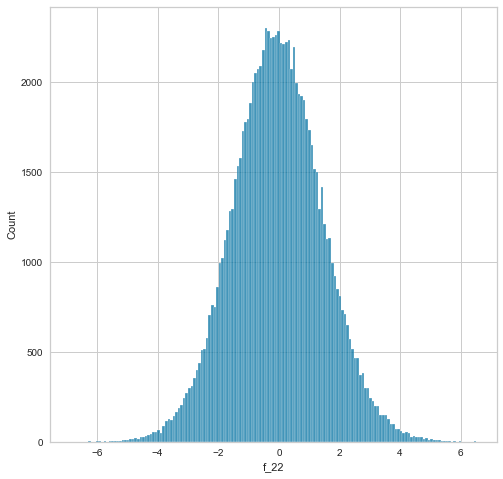

--------------------------------------------------
Column: f_23
Mean Value: -0.22000224600272153
Standard deviation: 1.4948355190687004
Min Value: -8.234304569765438
Max Value: 6.054830975249404
Not Normal Distribution


/Users/sergiotallotorres/PycharmProjects/kaggle_competitions/env/lib/python3.10/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


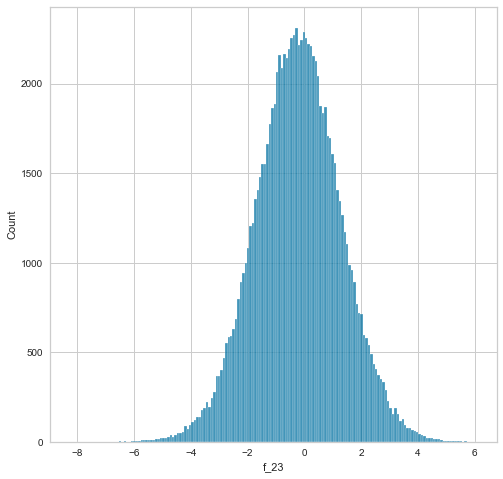

--------------------------------------------------
Column: f_24
Mean Value: 0.16643363019253563
Standard deviation: 1.5430139689935576
Min Value: -7.792363437834567
Max Value: 7.527270789053787
Not Normal Distribution


/Users/sergiotallotorres/PycharmProjects/kaggle_competitions/env/lib/python3.10/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


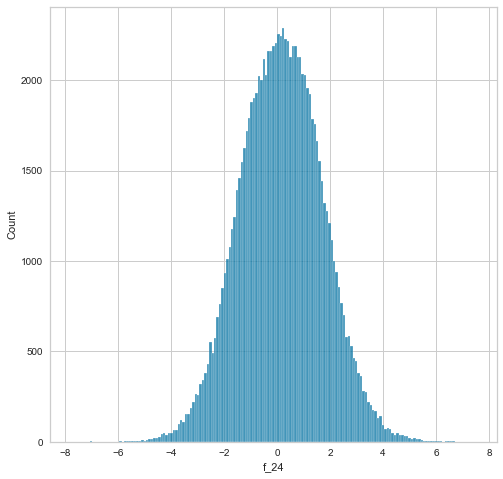

--------------------------------------------------
Column: f_25
Mean Value: -0.06430904583080471
Standard deviation: 1.5760855408956322
Min Value: -6.593841665058258
Max Value: 7.544731070306986
Not Normal Distribution


/Users/sergiotallotorres/PycharmProjects/kaggle_competitions/env/lib/python3.10/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


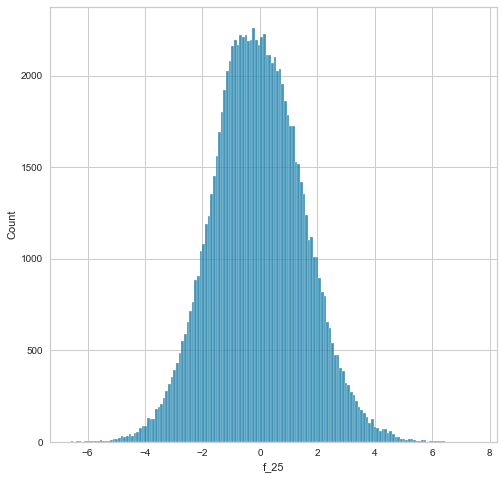

--------------------------------------------------
Column: f_26
Mean Value: -0.06253997978600698
Standard deviation: 1.4280548306058654
Min Value: -7.375718523592724
Max Value: 7.00560771239826
Not Normal Distribution


/Users/sergiotallotorres/PycharmProjects/kaggle_competitions/env/lib/python3.10/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


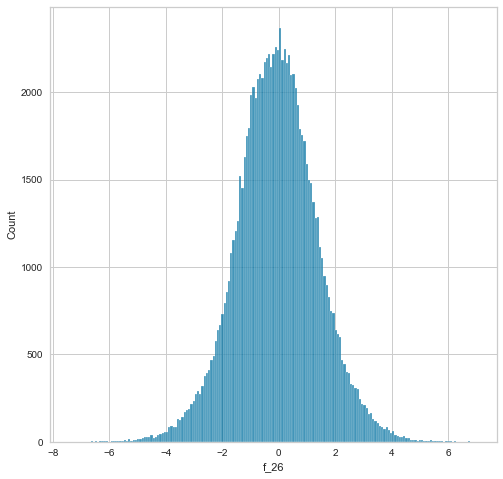

--------------------------------------------------
Column: f_27
Mean Value: 0.09847213479560038
Standard deviation: 1.3054070609812956
Min Value: -7.335556393506247
Max Value: 7.205971281645636
Not Normal Distribution


/Users/sergiotallotorres/PycharmProjects/kaggle_competitions/env/lib/python3.10/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


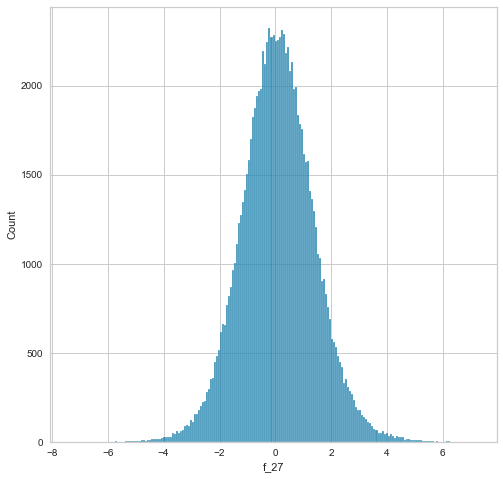

--------------------------------------------------
Column: f_28
Mean Value: -0.23090999444348814
Standard deviation: 1.5284759392507545
Min Value: -6.954151411640634
Max Value: 6.977149788370391
Not Normal Distribution


/Users/sergiotallotorres/PycharmProjects/kaggle_competitions/env/lib/python3.10/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


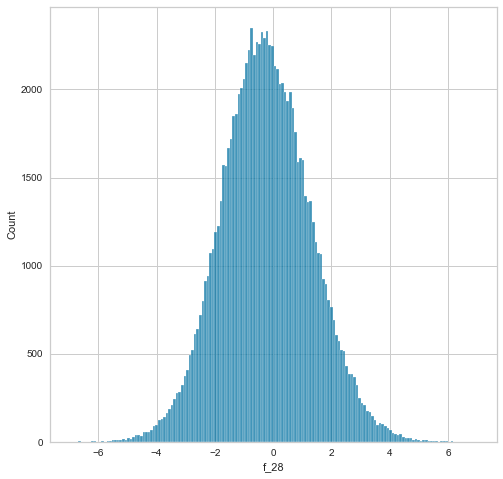

--------------------------------------------------


In [75]:
for col in data.columns:
    print(f'Column: {col}')
    print(f'Mean Value: {data[col].mean()}')
    print(f'Standard deviation: {data[col].std()}')
    print(f'Min Value: {data[col].min()}')
    print(f'Max Value: {data[col].max()}')
    # Check if normal distribution using Shapiro-Wilk Test
    _, p_value = shapiro(data[col])
    alpha = 0.05
    plt.figure(figsize=(8,8))
    if p_value > alpha:
        print('Normal Distribution')
        sns.displot(data[col])
    else:
        print('Not Normal Distribution')
        sns.histplot(data[col])
    plt.show()
    print('-'*50)

All the columns containing continuous data have a normal distribution. With mean values of 0 and Stddev of 1.

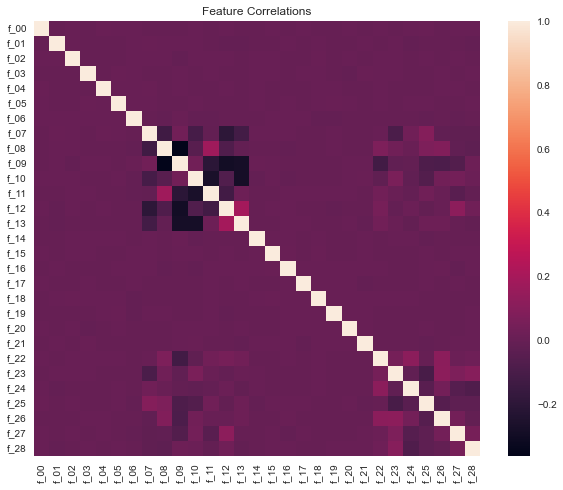

In [76]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr())
plt.title('Feature Correlations')
plt.show()

# Clustering

Search for the best number (most probable) of clusters (k) using the Elbow Method

100%|██████████| 49/49 [06:18<00:00,  7.72s/it]


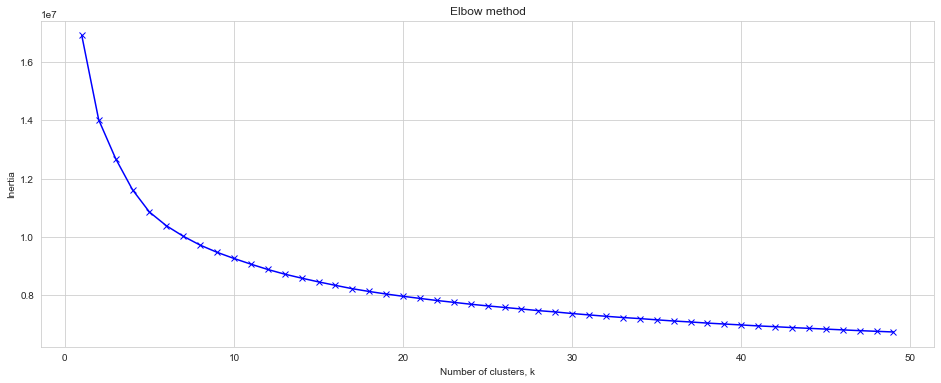

In [9]:
# First Plotting the inertia of the possible clusters

inertia = []
for k in tqdm(range(1,50)):
    km = KMeans(n_clusters=k)
    km.fit(data)
    inertia.append(km.inertia_)

# Plot inertia vs number of clusters, k
plt.figure(figsize=(16,6))
plt.plot(range(1,50), inertia, 'bx-')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Elbow method')
plt.show()

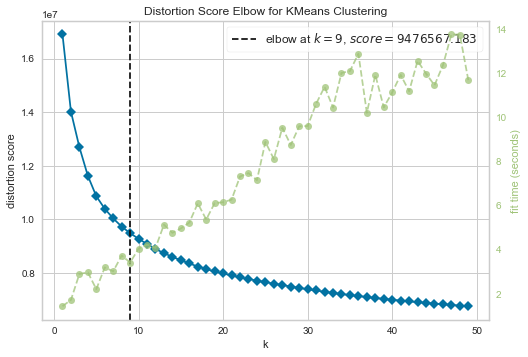

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
# Than using a K Elbow Visualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,50))
visualizer.fit(data)
visualizer.show()

# Predictions using all the features

In [77]:
scaled_data = pd.DataFrame(RobustScaler().fit_transform(data))

In [78]:
scaled_data.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-0.289422,-0.681709,0.480993,0.440438,-0.608419,0.543306,1.676349,-0.6,1.4,1.000000,...,-0.353703,-0.557990,-0.565412,-0.529246,0.691952,-0.495728,0.584470,0.758663,0.825922,0.533586
1,-0.511108,-0.341509,0.484862,0.742530,-1.212936,0.639854,-0.065699,-0.6,-0.6,-0.142857,...,-0.316972,-0.065748,-1.320256,-0.400787,0.344902,0.750813,-0.083245,-0.429556,0.287253,-1.184987
2,0.596716,0.235716,-0.866959,-0.462063,0.079962,0.580627,1.475939,0.0,1.0,-0.285714,...,-0.305678,-1.181785,0.880282,1.701789,0.066428,-1.101325,-0.413752,0.773337,-0.713536,-1.652338
3,-0.371865,0.164895,0.195896,0.174549,0.307565,-0.906470,0.104486,0.2,-0.8,0.857143,...,0.458849,0.950851,0.393496,0.559780,-0.926260,0.600437,-0.850858,-0.307835,-0.079478,0.250674
4,-0.497813,-0.775679,-0.199894,-1.358790,-0.210868,-1.374829,0.581336,0.6,0.2,-0.285714,...,-1.205283,-0.320349,0.237929,0.174599,-1.127764,0.616204,-0.446679,0.920087,-0.291599,-0.843995


In [79]:
from sklearn.mixture import BayesianGaussianMixture

model_bgmm = BayesianGaussianMixture(n_components=7, covariance_type='full', max_iter=100, n_init=5, random_state=1)
# Best Results with this with this hyperparameters (0.51797)

preds_bgmm = model_bgmm.fit_predict(scaled_data)

(98000,)


Text(0.5, 1.0, 'Number of elements in the predicted clusters')

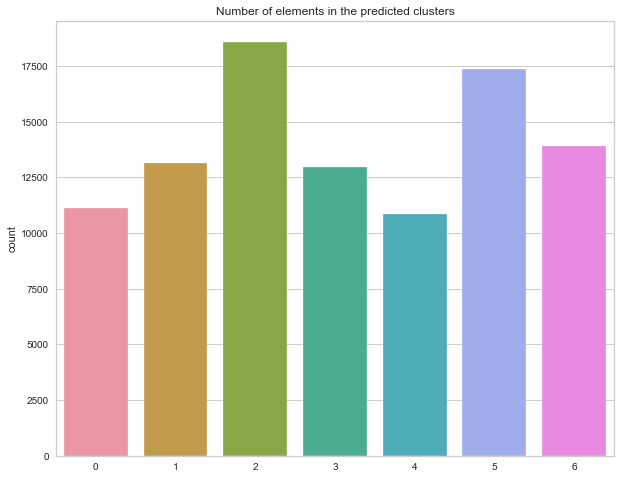

In [80]:
print(preds_bgmm.shape)

plt.figure(figsize=(10,8))
sns.countplot(x=preds_bgmm)
plt.title('Number of elements in the predicted clusters')

In [81]:
final_df = pd.DataFrame(preds_bgmm, columns=['Predicted'])
final_df.insert(0, 'Id', range(len(final_df)))
final_df.head()

,Id,Predicted
0,0,6
1,1,1
2,2,6
3,3,4
4,4,2


In [51]:
final_df.to_csv('file_name.csv', index=False)

# Feature Selection

In [82]:
selector = VarianceThreshold(threshold=1.5)
selector.fit_transform(data)

array([[ 2.        , 13.        , 14.        , ...,  1.30907338,
         1.46300211,  0.81352704],
       [ 2.        ,  3.        ,  6.        , ..., -0.85216764,
         0.56245739, -2.6805412 ],
       [ 5.        , 11.        ,  5.        , ...,  1.33576324,
        -1.11065521, -3.63072301],
       ...,
       [ 8.        ,  9.        , 10.        , ...,  2.14269334,
         1.6460418 ,  0.64146631],
       [ 1.        ,  8.        , 11.        , ..., -1.61095406,
        -0.6162274 , -0.06621112],
       [ 0.        , 11.        ,  3.        , ..., -0.97089717,
         1.40498831, -0.71109789]])

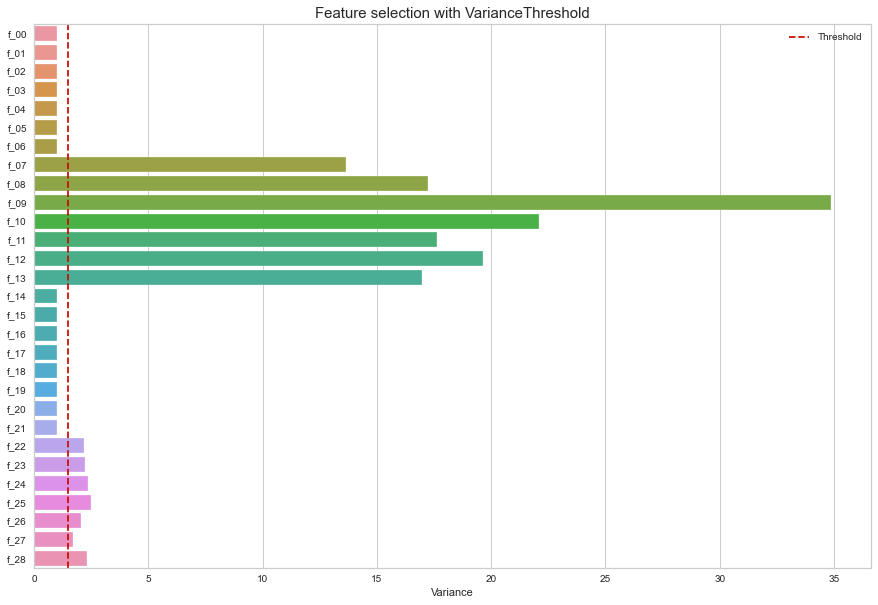

In [83]:
plt.figure(figsize=(15,10))
sns.barplot(x=selector.variances_, y=data.columns,orient='h' ).set_title('Feature selection with VarianceThreshold',size=15)
plt.xlabel('Variance')
plt.axvline(x=1.5, color='r', linestyle='--', label='Threshold')
plt.legend()

In [84]:
Selected_features = list(selector.get_feature_names_out())
data_feat = data[Selected_features]
data_feat.head()

,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_22,f_23,f_24,f_25,f_26,f_27,f_28
id,,,,,,,,,,,,,,
0,2,13,14,5,13,6,6,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,2,3,6,4,6,16,9,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,5,11,5,8,9,3,11,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,6,2,13,8,9,6,4,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,8,7,5,3,1,13,11,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


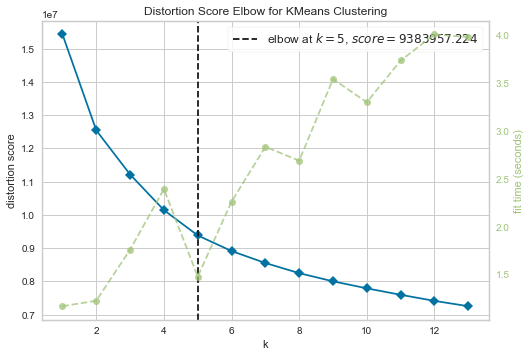

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [62]:
# Use the K Elbow Visualizer with the dataset with the selected features

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,14))
visualizer.fit(data_feat)
visualizer.show()

In [86]:
# Scaled the data

scaled_data_feat = pd.DataFrame(RobustScaler().fit_transform(data_feat))
scaled_data_feat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.6,1.4,1.000000,-0.333333,0.833333,0.000000,0.000000,-0.529246,0.691952,-0.495728,0.584470,0.758663,0.825922,0.533586
1,-0.6,-0.6,-0.142857,-0.500000,-0.333333,1.666667,0.500000,-0.400787,0.344902,0.750813,-0.083245,-0.429556,0.287253,-1.184987
2,0.0,1.0,-0.285714,0.166667,0.166667,-0.500000,0.833333,1.701789,0.066428,-1.101325,-0.413752,0.773337,-0.713536,-1.652338
3,0.2,-0.8,0.857143,0.166667,0.166667,0.000000,-0.333333,0.559780,-0.926260,0.600437,-0.850858,-0.307835,-0.079478,0.250674
4,0.6,0.2,-0.285714,-0.666667,-1.166667,1.166667,0.833333,0.174599,-1.127764,0.616204,-0.446679,0.920087,-0.291599,-0.843995


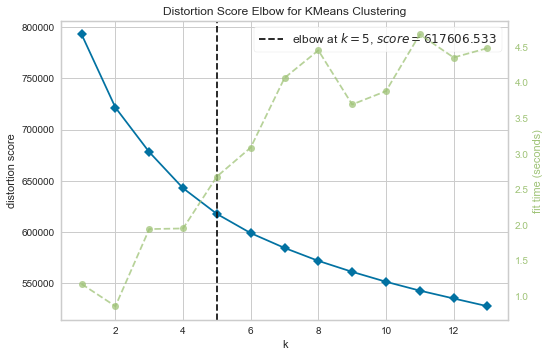

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [87]:
# Use the K Elbow Visualizer another time with the scaled data

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,14))
visualizer.fit(scaled_data_feat)
visualizer.show()

In [88]:
from sklearn.mixture import BayesianGaussianMixture

model_bgmm = BayesianGaussianMixture(n_components=7, covariance_type='full', max_iter=100, n_init=5, random_state=1)
# Best Results with this hyperparameters (0.51797)

preds_bgmm = model_bgmm.fit_predict(scaled_data_feat)

(98000,)


Text(0.5, 1.0, 'Number of elements in the predicted clusters')

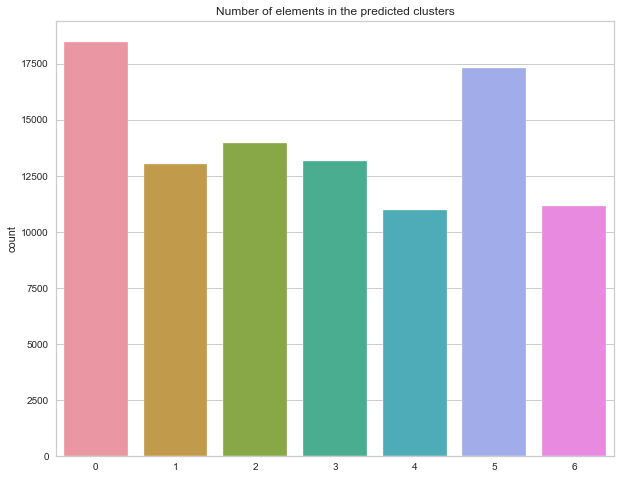

In [89]:
print(preds_bgmm.shape)

plt.figure(figsize=(10,8))
sns.countplot(x=preds_bgmm)
plt.title('Number of elements in the predicted clusters')

In [90]:
final_df_feat = pd.DataFrame(preds_bgmm, columns=['Predicted'])
final_df_feat.insert(0, 'Id', range(len(final_df_feat)))
final_df_feat.head()

,Id,Predicted
0,0,2
1,1,3
2,2,2
3,3,4
4,4,0


In [94]:
count = 0
for i in range(len(final_df)):
    if final_df.iloc[i][1] != final_df_feat.iloc[i][1]:
        count+= 1

print(count)
print(count/len(final_df))

69941
0.7136836734693878


In [95]:
final_df.to_csv('final_df.csv', index=False)
final_df_feat.to_csv('final_df_feat.csv', index=False)

In [96]:
for i in range(len(final_df)):
    if final_df.iloc[i][1] == 6 and final_df_feat.iloc[i][1] != 2:
        count+= 1
    elif final_df.iloc[i][1] == 1 and final_df_feat.iloc[i][1] != 3:
        count+= 1
    elif final_df.iloc[i][1] == 4 and final_df_feat.iloc[i][1] != 4:
        count+= 1
    elif final_df.iloc[i][1] == 2 and final_df_feat.iloc[i][1] != 0:
        count+= 1
    elif final_df.iloc[i][1] == 3 and final_df_feat.iloc[i][1] != 1:
        count+= 1
    elif final_df.iloc[i][1] == 5 and final_df_feat.iloc[i][1] != 6:
        count+= 1
print(count)
print(count/len(final_df))

89271
0.9109285714285714


# Remove outliers

In [100]:
import scipy.stats as stats

def grubbs_test(x, feature):
    n = len(x)
    mean_x = np.mean(x)
    sd_x = np.std(x)
    numerator = max(abs(x-mean_x))
    g_calculated = numerator/sd_x
    t_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
    g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))
    if g_critical > g_calculated:
        outlier_presence = False
    else:
        outlier_presence = True

    return outlier_presence

outliers_features = []
for col in scaled_data_feat.columns:
    if grubbs_test(scaled_data_feat[col], col):
        outliers_features.append(col)

In [102]:
# Thus, the following features have outliers on their data
print(outliers_features)

[0, 1, 2, 3, 5, 6, 8, 9, 11, 12]


In [103]:
scaled_data_feat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.6,1.4,1.000000,-0.333333,0.833333,0.000000,0.000000,-0.529246,0.691952,-0.495728,0.584470,0.758663,0.825922,0.533586
1,-0.6,-0.6,-0.142857,-0.500000,-0.333333,1.666667,0.500000,-0.400787,0.344902,0.750813,-0.083245,-0.429556,0.287253,-1.184987
2,0.0,1.0,-0.285714,0.166667,0.166667,-0.500000,0.833333,1.701789,0.066428,-1.101325,-0.413752,0.773337,-0.713536,-1.652338
3,0.2,-0.8,0.857143,0.166667,0.166667,0.000000,-0.333333,0.559780,-0.926260,0.600437,-0.850858,-0.307835,-0.079478,0.250674
4,0.6,0.2,-0.285714,-0.666667,-1.166667,1.166667,0.833333,0.174599,-1.127764,0.616204,-0.446679,0.920087,-0.291599,-0.843995


In [106]:
df = scaled_data_feat[[4, 7, 10, 13]]

In [107]:
df.head()

,4,7,10,13
0,0.833333,-0.529246,0.584470,0.533586
1,-0.333333,-0.400787,-0.083245,-1.184987
2,0.166667,1.701789,-0.413752,-1.652338
3,0.166667,0.559780,-0.850858,0.250674
4,-1.166667,0.174599,-0.446679,-0.843995


/Users/sergiotallotorres/PycharmProjects/kaggle_competitions/env/lib/python3.10/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


(98000,)


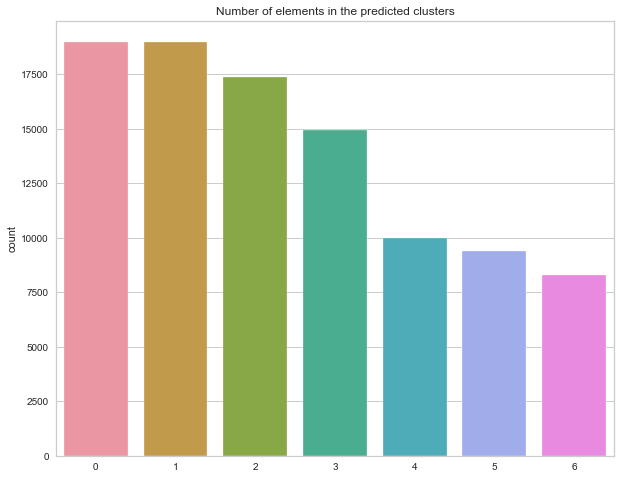

In [108]:
model_bgmm = BayesianGaussianMixture(n_components=7, covariance_type='full', max_iter=100, n_init=5, random_state=1)
# Best Results with this hyperparameters (0.51797)

preds_bgmm = model_bgmm.fit_predict(df)

print(preds_bgmm.shape)

plt.figure(figsize=(10,8))
sns.countplot(x=preds_bgmm)
plt.title('Number of elements in the predicted clusters')


In [109]:
no_out = pd.DataFrame(preds_bgmm, columns=['Predicted'])
no_out.insert(0, 'Id', range(len(no_out)))
no_out.head()

no_out.to_csv('no_out_df.csv', index=False)